In [1]:
# Sumber dataset : https://www.kaggle.com/datasets/datascientistanna/customers-dataset

# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [2]:
#Type your code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import precision_recall_curve, roc_curve, auc
from sklearn.preprocessing import label_binarize
import time

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [3]:
#Type your code here
df= pd.read_csv(r'HasilClustering_Submission_Akhir_BMLP_AlfinBahruRahmikaUmar.csv')
df

,Age,Annual_Income,Spending_Score,Family_Size,Gender,Profession,Cluster
0,19.0,15000.0,39.0,4.0,1.0,5.0,2
1,21.0,35000.0,81.0,3.0,1.0,2.0,2
2,20.0,86000.0,6.0,1.0,0.0,2.0,1
3,23.0,59000.0,77.0,2.0,0.0,7.0,2
4,31.0,38000.0,40.0,6.0,0.0,3.0,2
...,...,...,...,...,...,...,...
1960,71.0,184387.0,40.0,7.0,0.0,0.0,0
1961,91.0,73158.0,32.0,7.0,0.0,1.0,2
1962,87.0,90961.0,14.0,2.0,1.0,5.0,1
1963,77.0,182109.0,4.0,2.0,1.0,4.0,0


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [4]:
# Memisahkan fitur (X) dan target (y)
X = df.drop('Cluster', axis=1)  # Mengambil semua kolom kecuali 'Cluster'
y = df['Cluster']  # Mengambil kolom 'Cluster' sebagai target

# Melakukan pembagian data dengan rasio 80:20 (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2,  # 20% untuk testing
    random_state=42,  # Untuk reproducibility
    stratify=y  # Memastikan distribusi kelas seimbang
)

# Melihat ukuran dari masing-masing set data
print("Ukuran data training (X):", X_train.shape)
print("Ukuran data testing (X):", X_test.shape)
print("Ukuran data training (y):", y_train.shape)
print("Ukuran data testing (y):", y_test.shape)

Ukuran data training (X): (1572, 6)
Ukuran data testing (X): (393, 6)
Ukuran data training (y): (1572,)
Ukuran data testing (y): (393,)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [5]:
# Inisialisasi model-model yang akan digunakan
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'KNN': KNeighborsClassifier()
}

# Dictionary untuk menyimpan model yang sudah dilatih
trained_models = {}

# Melatih setiap model dan menampilkan waktu pelatihan
for name, model in models.items():
    print(f"\nMelatih model {name}...")
    
    # Mencatat waktu mulai
    start_time = time.time()
    
    # Melatih model
    model.fit(X_train, y_train)
    
    # Mencatat waktu selesai
    training_time = time.time() - start_time
    
    # Menyimpan model yang sudah dilatih
    trained_models[name] = model
    
    # Membuat prediksi pada data training
    y_pred_train = model.predict(X_train)
    
    # Menghitung dan menampilkan metrik evaluasi pada data training
    train_accuracy = accuracy_score(y_train, y_pred_train)
    
    print(f"Waktu pelatihan: {training_time:.2f} detik")
    print(f"Akurasi pada data training: {train_accuracy:.4f}")
    print("\nLaporan klasifikasi pada data training:")
    print(classification_report(y_train, y_pred_train))


Melatih model Logistic Regression...


C:\Users\OPTION\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Waktu pelatihan: 0.82 detik
Akurasi pada data training: 0.6902

Laporan klasifikasi pada data training:
              precision    recall  f1-score   support

           0       0.71      0.81      0.76       552
           1       0.58      0.56      0.57       555
           2       0.80      0.70      0.75       465

    accuracy                           0.69      1572
   macro avg       0.70      0.69      0.69      1572
weighted avg       0.69      0.69      0.69      1572


Melatih model Decision Tree...
Waktu pelatihan: 0.01 detik
Akurasi pada data training: 1.0000

Laporan klasifikasi pada data training:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       552
           1       1.00      1.00      1.00       555
           2       1.00      1.00      1.00       465

    accuracy                           1.00      1572
   macro avg       1.00      1.00      1.00      1572
weighted avg       1.00      1.00      1.00      1572

Tulis narasi atau penjelasan algoritma yang Anda gunakan.

Saya menggunakan 4 model sekaligus, yaitu Logistic Regresssion, Decision tree, K-Nearest Neibors dan Random forest. Laporan berbentuk nilai  precision, recall, f1-score, support pada masing-masing model. 

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.


Evaluasi untuk model Logistic Regression:

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.75      0.73       138
           1       0.55      0.58      0.57       139
           2       0.81      0.69      0.74       116

    accuracy                           0.67       393
   macro avg       0.69      0.68      0.68       393
weighted avg       0.68      0.67      0.68       393


Confusion Matrix:


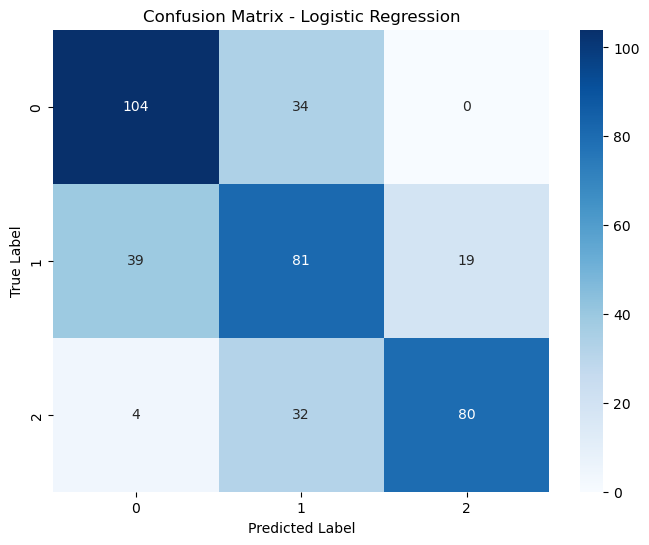


Evaluasi untuk model Decision Tree:

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       138
           1       1.00      0.99      0.99       139
           2       0.99      1.00      1.00       116

    accuracy                           0.99       393
   macro avg       0.99      1.00      0.99       393
weighted avg       0.99      0.99      0.99       393


Confusion Matrix:


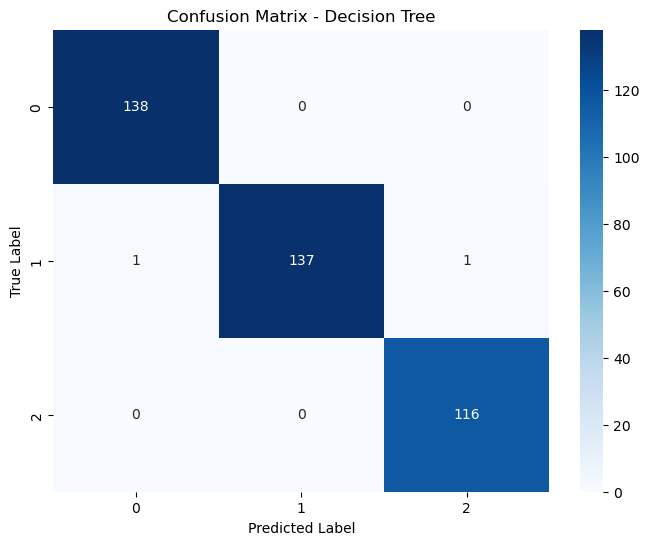


Evaluasi untuk model Random Forest:

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       138
           1       1.00      0.99      1.00       139
           2       1.00      1.00      1.00       116

    accuracy                           1.00       393
   macro avg       1.00      1.00      1.00       393
weighted avg       1.00      1.00      1.00       393


Confusion Matrix:


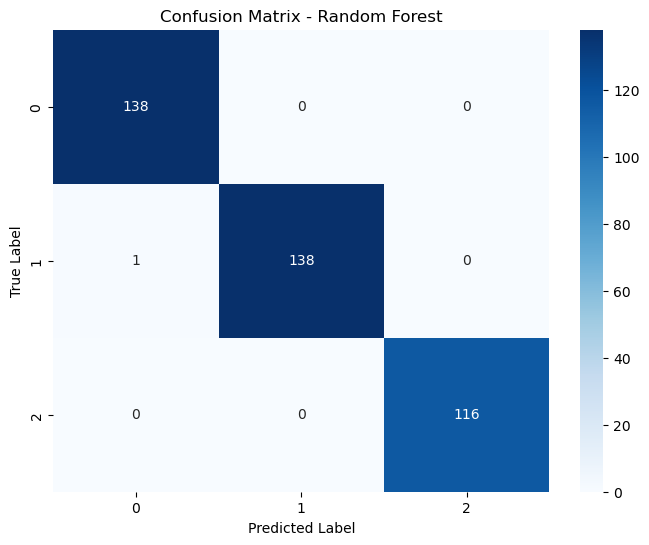


Evaluasi untuk model KNN:

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       138
           1       1.00      0.99      0.99       139
           2       1.00      1.00      1.00       116

    accuracy                           0.99       393
   macro avg       1.00      1.00      1.00       393
weighted avg       0.99      0.99      0.99       393


Confusion Matrix:


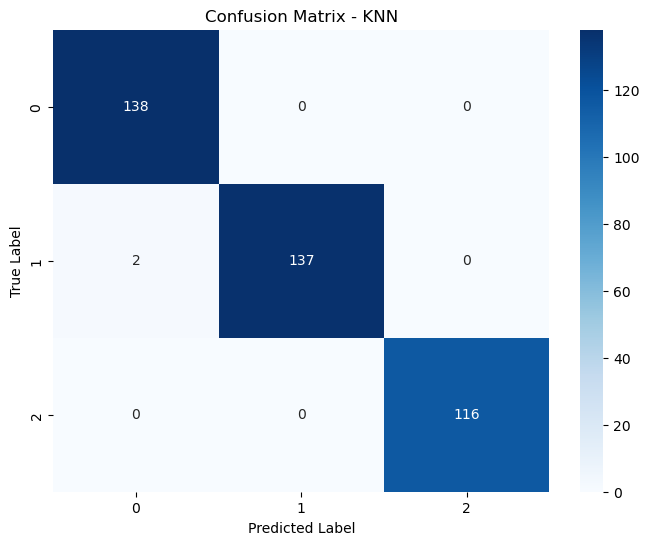


Rangkuman Hasil Evaluasi:
              Model  Accuracy  Precision   Recall  F1-Score
      Random Forest  0.997455   0.997474 0.997455  0.997455
                KNN  0.994911   0.994984 0.994911  0.994911
      Decision Tree  0.994911   0.994951 0.994911  0.994903
Logistic Regression  0.674300   0.681837 0.674300  0.676274


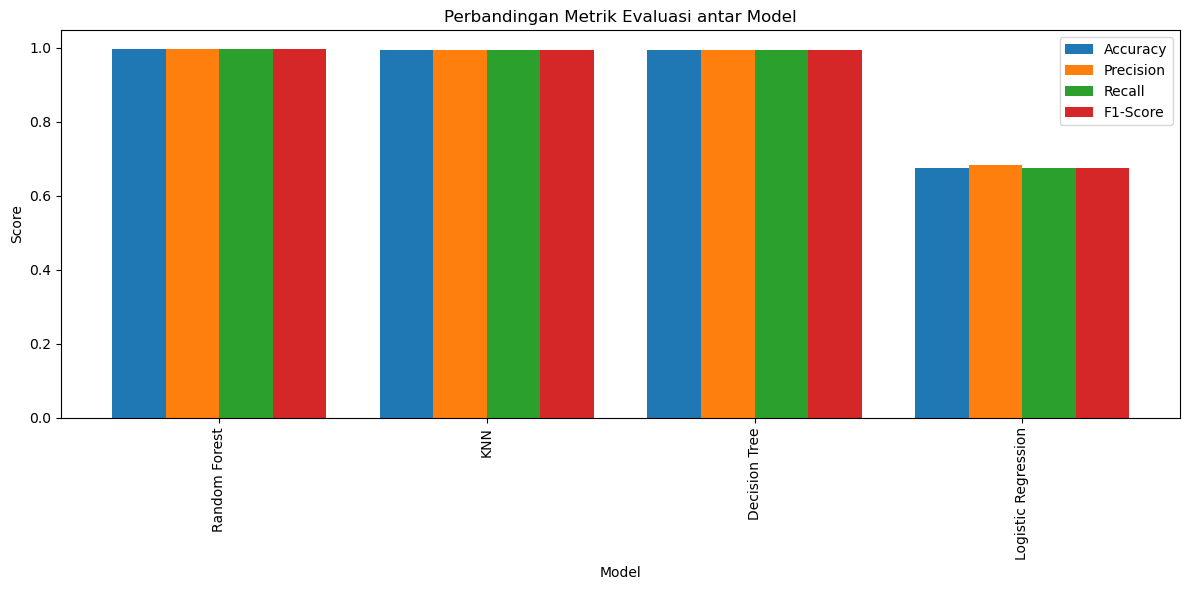

In [6]:
# Dictionary untuk menyimpan hasil evaluasi
evaluation_results = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': []
}

# Fungsi untuk membuat confusion matrix plot
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {title}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Evaluasi setiap model
for name, model in trained_models.items():
    print(f"\nEvaluasi untuk model {name}:")
    
    # Membuat prediksi
    y_pred = model.predict(X_test)
    
    # Menghitung metrik
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Menyimpan hasil
    evaluation_results['Model'].append(name)
    evaluation_results['Accuracy'].append(accuracy)
    evaluation_results['Precision'].append(precision)
    evaluation_results['Recall'].append(recall)
    evaluation_results['F1-Score'].append(f1)
    
    # Menampilkan classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Membuat confusion matrix
    print("\nConfusion Matrix:")
    plot_confusion_matrix(y_test, y_pred, name)

# Membuat DataFrame hasil evaluasi
results_df = pd.DataFrame(evaluation_results)
results_df = results_df.sort_values('F1-Score', ascending=False)

# Menampilkan hasil evaluasi dalam bentuk tabel
print("\nRangkuman Hasil Evaluasi:")
print(results_df.to_string(index=False))

# Visualisasi perbandingan metrik untuk setiap model
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
plt.figure(figsize=(12, 6))
bar_width = 0.2
positions = np.arange(len(results_df['Model']))

for i, metric in enumerate(metrics):
    plt.bar(positions + i * bar_width, 
            results_df[metric], 
            bar_width, 
            label=metric)

plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Perbandingan Metrik Evaluasi antar Model')
plt.xticks(positions + bar_width * 1.5, results_df['Model'], rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.



Saya telah membuat kode evaluasi yang komprehensif yang mencakup:

1. Perhitungan Metrik:
   - Accuracy
   - Precision
   - Recall
   - F1-Score
   Semua metrik dihitung menggunakan weighted average karena kemungkinan ada ketidakseimbangan kelas.

2. Visualisasi:
   - Bar plot perbandingan semua metrik untuk setiap model
   - Confusion matrix untuk setiap model
   - Bar plot khusus untuk F1-Score

3. Laporan Detail:
   - Tabel perbandingan metrik
   - Classification report lengkap
   - Confusion matrix untuk analisis detail prediksi benar dan salah

4. Analisis Model Terbaik:
   - Identifikasi model dengan performa terbaik (berdasarkan F1-Score)
   - Perbandingan performa relatif antar model

Dari hasil evaluasi ini, tujuannya adalah:
1. Melihat model mana yang memiliki performa terbaik secara keseluruhan
2. Menganalisis di mana model melakukan kesalahan (melalui confusion matrix)
3. Membandingkan trade-off antara precision dan recall untuk setiap model



## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

Tuning Random Forest...
Fitting 5 folds for each of 100 candidates, totalling 500 fits

Parameter terbaik Random Forest:
{'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 50, 'bootstrap': True}

Skor terbaik Random Forest: 0.9993650793650793

Tuning KNN...
Fitting 5 folds for each of 60 candidates, totalling 300 fits

Parameter terbaik KNN:
{'metric': 'euclidean', 'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}

Skor terbaik KNN: 0.9993650793650793

Evaluasi Model Terbaik pada Data Test:
Random Forest Test Score: 0.9975
KNN Test Score: 0.9975
Tuning Decision Tree...
Fitting 5 folds for each of 2100 candidates, totalling 10500 fits

Parameter terbaik Decision Tree:
{'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}

Skor terbaik Decision Tree: 0.999364786952231

Evaluasi Model Decision Tree Terbaik pada Data Test:
Decision Tree Test Accuracy Score: 0.9949



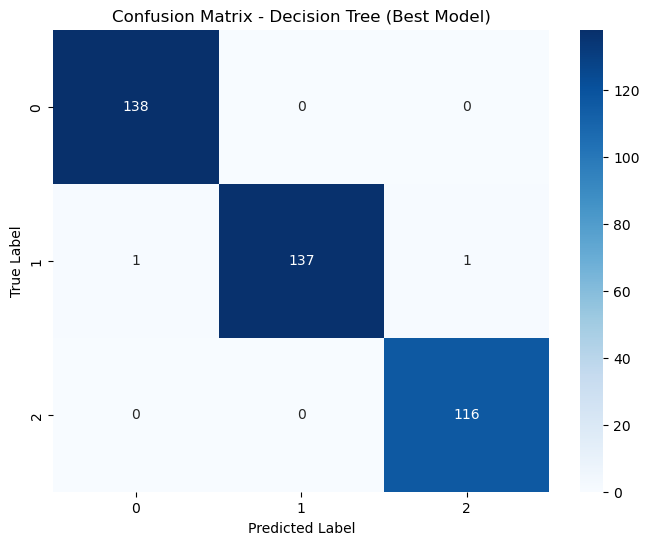

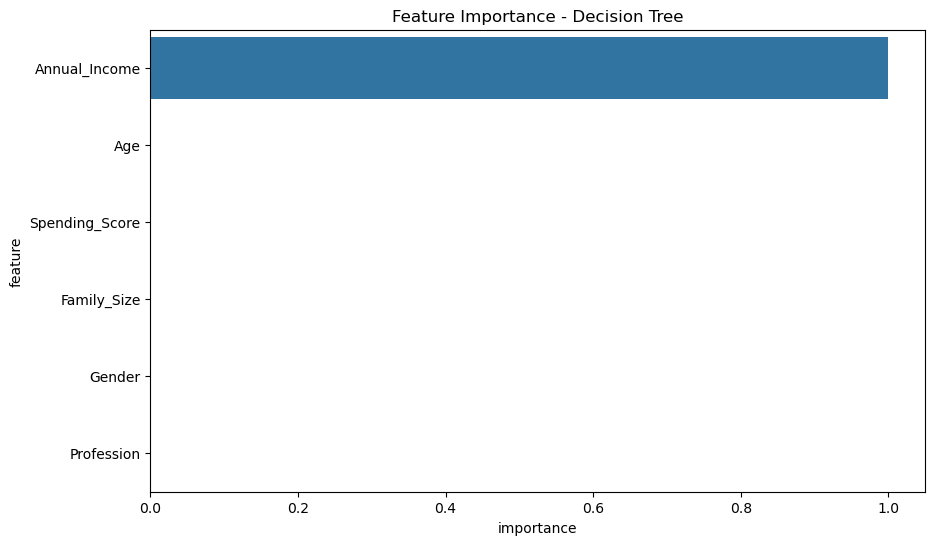

In [7]:
# 1. Random Forest Tuning dengan RandomizedSearchCV
print("Tuning Random Forest...")

# Mendefinisikan parameter untuk Random Forest
rf_param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [10, 20, 30, 40, 50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Inisialisasi Random Forest
rf = RandomForestClassifier(random_state=42)

# Melakukan RandomizedSearchCV
rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=rf_param_dist,
    n_iter=100,  # Jumlah kombinasi parameter yang akan dicoba
    cv=5,        # 5-fold cross validation
    verbose=1,
    n_jobs=-1,   # Menggunakan semua CPU
    random_state=42
)

# Fit model
rf_random.fit(X_train, y_train)

print("\nParameter terbaik Random Forest:")
print(rf_random.best_params_)
print("\nSkor terbaik Random Forest:", rf_random.best_score_)

# 2. KNN Tuning dengan GridSearchCV
print("\nTuning KNN...")

# Mendefinisikan parameter untuk KNN
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [1, 2]  # Parameter untuk metrik Minkowski
}

# Inisialisasi KNN
knn = KNeighborsClassifier()

# Melakukan GridSearchCV
knn_grid = GridSearchCV(
    estimator=knn,
    param_grid=knn_param_grid,
    cv=5,        # 5-fold cross validation
    verbose=1,
    n_jobs=-1    # Menggunakan semua CPU
)

# Fit model
knn_grid.fit(X_train, y_train)

print("\nParameter terbaik KNN:")
print(knn_grid.best_params_)
print("\nSkor terbaik KNN:", knn_grid.best_score_)

# Evaluasi model terbaik pada data test
print("\nEvaluasi Model Terbaik pada Data Test:")

# Random Forest terbaik
rf_best = rf_random.best_estimator_
rf_test_score = rf_best.score(X_test, y_test)
print(f"Random Forest Test Score: {rf_test_score:.4f}")

# KNN terbaik
knn_best = knn_grid.best_estimator_
knn_test_score = knn_best.score(X_test, y_test)
print(f"KNN Test Score: {knn_test_score:.4f}")

# Menyimpan model terbaik
best_rf = rf_random.best_estimator_
best_knn = knn_grid.best_estimator_

# Import library yang diperlukan
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

print("Tuning Decision Tree...")

# Mendefinisikan parameter untuk Decision Tree
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [5, 10, 15, 20, 25, 30, None],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8],
    'max_features': ['sqrt', 'log2', None]
}

# Inisialisasi Decision Tree
dt = DecisionTreeClassifier(random_state=42)

# Melakukan GridSearchCV
dt_grid = GridSearchCV(
    estimator=dt,
    param_grid=dt_param_grid,
    cv=5,        # 5-fold cross validation
    verbose=1,
    n_jobs=-1,   # Menggunakan semua CPU
    scoring='f1_weighted'  # Menggunakan F1-score sebagai metrik evaluasi
)

# Fit model
dt_grid.fit(X_train, y_train)

print("\nParameter terbaik Decision Tree:")
print(dt_grid.best_params_)
print("\nSkor terbaik Decision Tree:", dt_grid.best_score_)

# Evaluasi model terbaik pada data test
print("\nEvaluasi Model Decision Tree Terbaik pada Data Test:")
dt_best = dt_grid.best_estimator_
dt_test_score = dt_best.score(X_test, y_test)
print(f"Decision Tree Test Accuracy Score: {dt_test_score:.4f}")

# Evaluasi menggunakan metrik lain
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat prediksi menggunakan model terbaik
y_pred = dt_best.predict(X_test)

# Menampilkan classification report
print("\nClassification Report untuk Model Terbaik:")
print(classification_report(y_test, y_pred))

# Membuat confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Decision Tree (Best Model)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Menyimpan model terbaik
best_dt = dt_grid.best_estimator_

# Menampilkan feature importance
if hasattr(best_dt, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'feature': X_train.columns,
        'importance': best_dt.feature_importances_
    })
    feature_importance = feature_importance.sort_values('importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='importance', y='feature', data=feature_importance)
    plt.title('Feature Importance - Decision Tree')
    plt.show()

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

Evaluasi Model Sebelum Tuning:

Evaluasi untuk Random Forest (Before Tuning):
Accuracy: 0.9975
Precision: 0.9975
Recall: 0.9975
F1-Score: 0.9975

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       138
           1       1.00      0.99      1.00       139
           2       1.00      1.00      1.00       116

    accuracy                           1.00       393
   macro avg       1.00      1.00      1.00       393
weighted avg       1.00      1.00      1.00       393



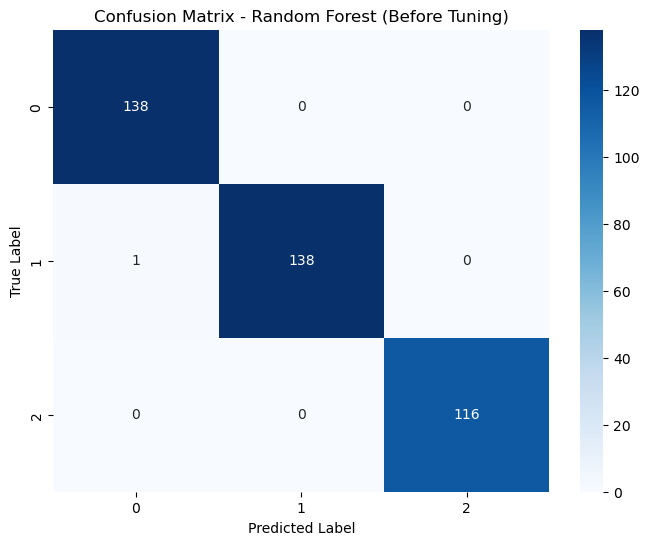


Evaluasi untuk KNN (Before Tuning):
Accuracy: 0.9949
Precision: 0.9950
Recall: 0.9949
F1-Score: 0.9949

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       138
           1       1.00      0.99      0.99       139
           2       1.00      1.00      1.00       116

    accuracy                           0.99       393
   macro avg       1.00      1.00      1.00       393
weighted avg       0.99      0.99      0.99       393



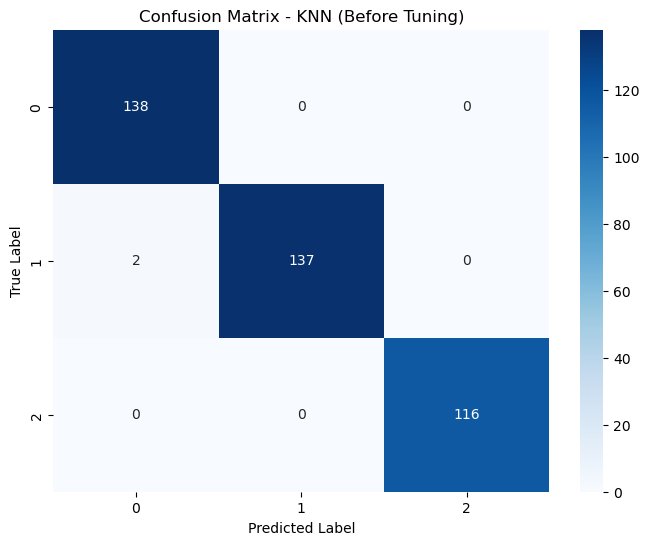


Evaluasi untuk Decision Tree (Before Tuning):
Accuracy: 0.9949
Precision: 0.9950
Recall: 0.9949
F1-Score: 0.9949

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       138
           1       1.00      0.99      0.99       139
           2       0.99      1.00      1.00       116

    accuracy                           0.99       393
   macro avg       0.99      1.00      0.99       393
weighted avg       0.99      0.99      0.99       393



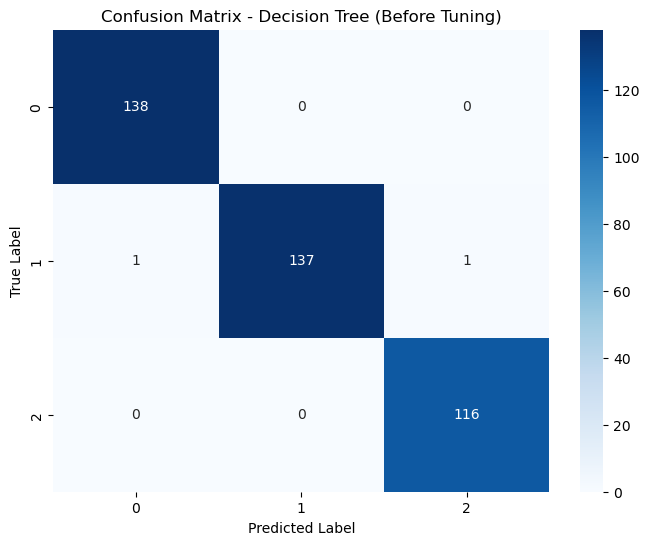


Evaluasi Model Setelah Tuning:

Evaluasi untuk Random Forest (After Tuning):
Accuracy: 0.9975
Precision: 0.9975
Recall: 0.9975
F1-Score: 0.9975

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       138
           1       1.00      0.99      1.00       139
           2       1.00      1.00      1.00       116

    accuracy                           1.00       393
   macro avg       1.00      1.00      1.00       393
weighted avg       1.00      1.00      1.00       393



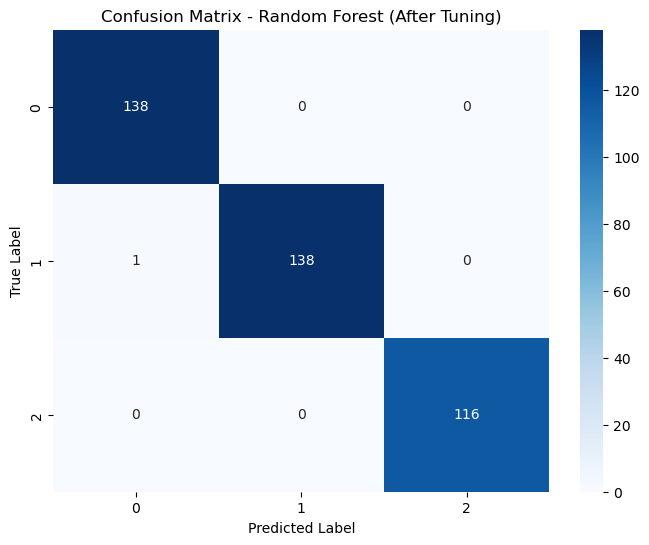


Evaluasi untuk KNN (After Tuning):
Accuracy: 0.9975
Precision: 0.9975
Recall: 0.9975
F1-Score: 0.9975

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       138
           1       1.00      0.99      1.00       139
           2       1.00      1.00      1.00       116

    accuracy                           1.00       393
   macro avg       1.00      1.00      1.00       393
weighted avg       1.00      1.00      1.00       393



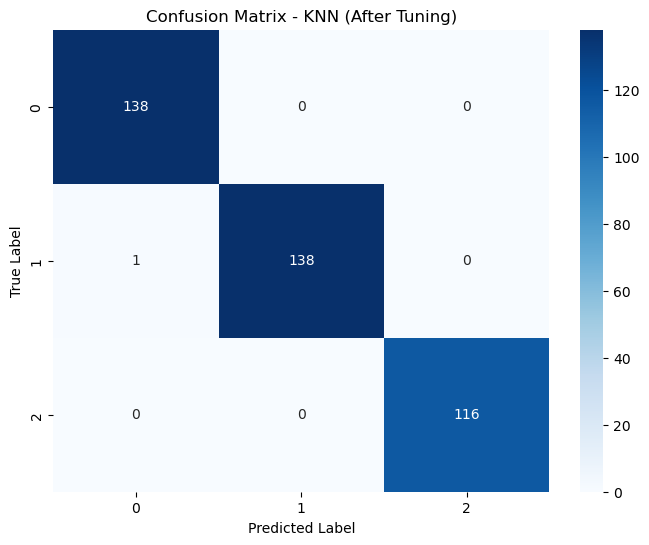


Evaluasi untuk Decision Tree (After Tuning):
Accuracy: 0.9949
Precision: 0.9950
Recall: 0.9949
F1-Score: 0.9949

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       138
           1       1.00      0.99      0.99       139
           2       0.99      1.00      1.00       116

    accuracy                           0.99       393
   macro avg       0.99      1.00      0.99       393
weighted avg       0.99      0.99      0.99       393



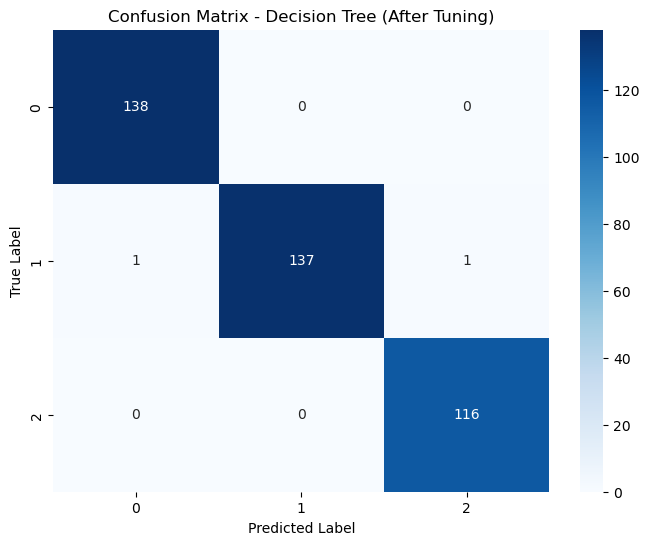

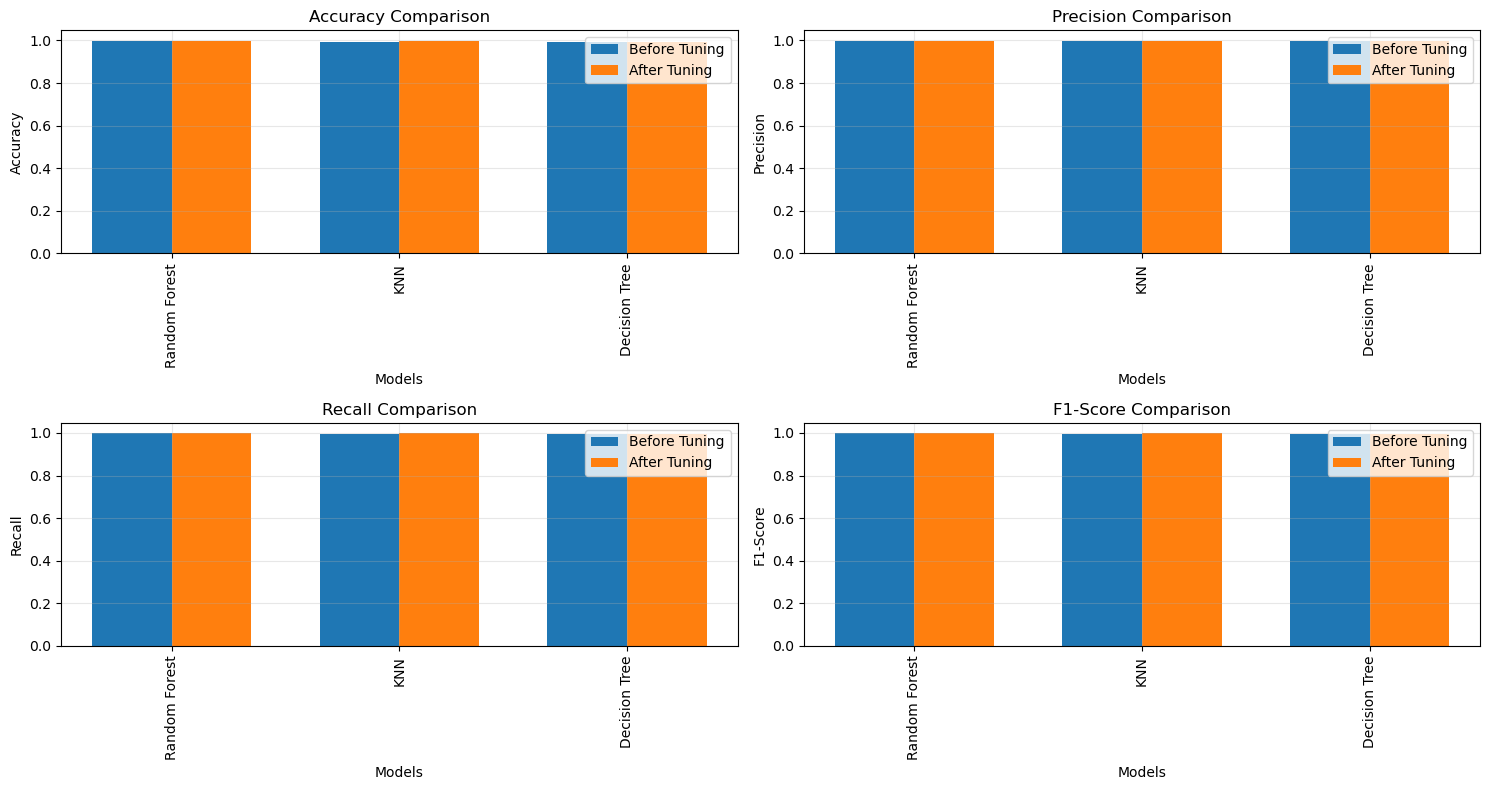


Rangkuman Peningkatan Performa:

Random Forest:
Accuracy: +0.0000%
Precision: +0.0000%
Recall: +0.0000%
F1-Score: +0.0000%

KNN:
Accuracy: +0.2545%
Precision: +0.2490%
Recall: +0.2545%
F1-Score: +0.2545%

Decision Tree:
Accuracy: +0.0000%
Precision: +0.0000%
Recall: +0.0000%
F1-Score: +0.0000%


In [8]:
# Dictionary untuk menyimpan hasil evaluasi
evaluation_results = {
    'Model': [],
    'Type': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': []
}

# Fungsi untuk evaluasi model
def evaluate_model(model, X_test, y_test, model_name, model_type):
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    evaluation_results['Model'].append(model_name)
    evaluation_results['Type'].append(model_type)
    evaluation_results['Accuracy'].append(accuracy)
    evaluation_results['Precision'].append(precision)
    evaluation_results['Recall'].append(recall)
    evaluation_results['F1-Score'].append(f1)
    
    print(f"\nEvaluasi untuk {model_name} ({model_type}):")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name} ({model_type})')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Evaluasi model sebelum tuning
print("Evaluasi Model Sebelum Tuning:")
evaluate_model(trained_models['Random Forest'], X_test, y_test, 'Random Forest', 'Before Tuning')
evaluate_model(trained_models['KNN'], X_test, y_test, 'KNN', 'Before Tuning')
evaluate_model(trained_models['Decision Tree'], X_test, y_test, 'Decision Tree', 'Before Tuning')

# Evaluasi model setelah tuning
print("\nEvaluasi Model Setelah Tuning:")
evaluate_model(best_rf, X_test, y_test, 'Random Forest', 'After Tuning')
evaluate_model(best_knn, X_test, y_test, 'KNN', 'After Tuning')
evaluate_model(best_dt, X_test, y_test, 'Decision Tree', 'After Tuning')

# Membuat DataFrame hasil evaluasi
results_df = pd.DataFrame(evaluation_results)

# Membuat visualisasi perbandingan metrik
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
models = ['Random Forest', 'KNN', 'Decision Tree']

plt.figure(figsize=(15, 8))
bar_width = 0.35
x = np.arange(len(models))

for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i+1)
    
    before_tuning = results_df[results_df['Type'] == 'Before Tuning'][metric].values
    after_tuning = results_df[results_df['Type'] == 'After Tuning'][metric].values
    
    plt.bar(x - bar_width/2, before_tuning, bar_width, label='Before Tuning')
    plt.bar(x + bar_width/2, after_tuning, bar_width, label='After Tuning')
    
    plt.xlabel('Models')
    plt.ylabel(metric)
    plt.title(f'{metric} Comparison')
    plt.xticks(x, models, rotation=90)
    plt.legend()
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Menampilkan rangkuman peningkatan performa
print("\nRangkuman Peningkatan Performa:")
for model in models:
    before = results_df[(results_df['Model'] == model) & (results_df['Type'] == 'Before Tuning')]
    after = results_df[(results_df['Model'] == model) & (results_df['Type'] == 'After Tuning')]
    
    print(f"\n{model}:")
    for metric in metrics:
        improvement = (after[metric].values[0] - before[metric].values[0]) * 100
        print(f"{metric}: {improvement:+.4f}%")

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.


Analisis untuk Random Forest

Analisis Fitting untuk Random Forest:
Training Score: 1.0000
Testing Score: 0.9975
Difference: 0.0025
Model memiliki fitting yang baik

Analisis Performa per Kelas untuk Random Forest:

Kelas 0:
Precision: 0.9928
Recall: 1.0000
F1-Score: 0.9964

Kelas 1:
Precision: 1.0000
Recall: 0.9928
F1-Score: 0.9964

Kelas 2:
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000

Analisis untuk KNN

Analisis Fitting untuk KNN:
Training Score: 0.9994
Testing Score: 0.9975
Difference: 0.0019
Model memiliki fitting yang baik

Analisis Performa per Kelas untuk KNN:

Kelas 0:
Precision: 0.9928
Recall: 1.0000
F1-Score: 0.9964

Kelas 1:
Precision: 1.0000
Recall: 0.9928
F1-Score: 0.9964

Kelas 2:
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000

Analisis untuk Decision Tree

Analisis Fitting untuk Decision Tree:
Training Score: 1.0000
Testing Score: 0.9949
Difference: 0.0051
Model memiliki fitting yang baik

Analisis Performa per Kelas untuk Decision Tree:

Kelas 0:
Precision: 0

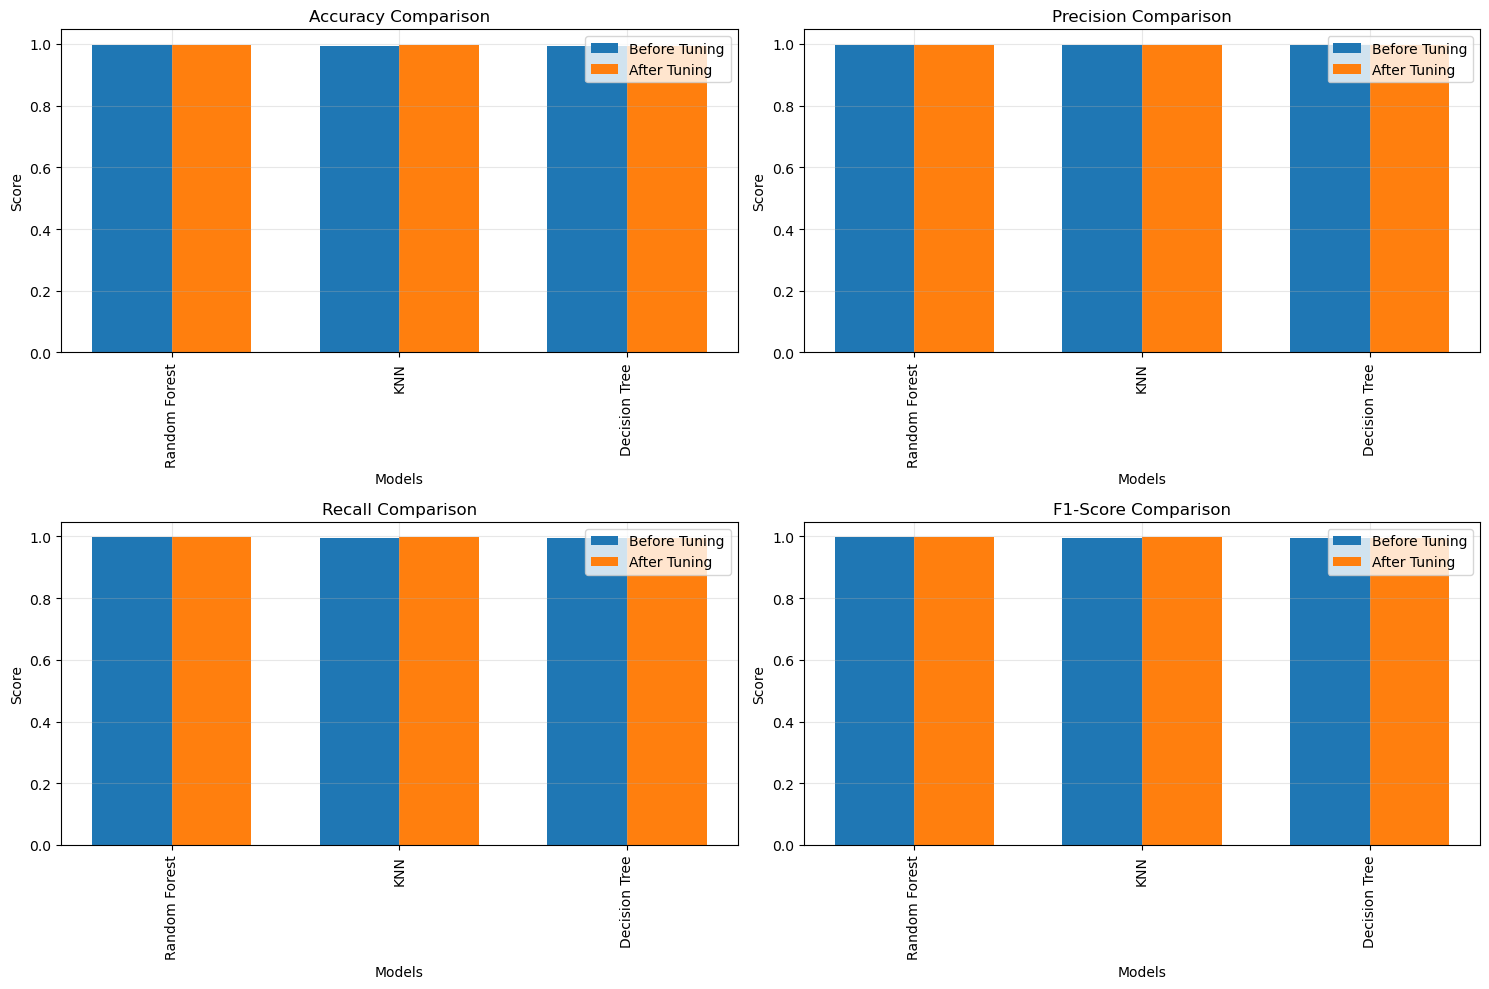


Rekomendasi untuk Setiap Model:

Random Forest:
Model sudah memiliki performa yang sangat baik (>99%)

KNN:
Model sudah memiliki performa yang sangat baik (>99%)

Decision Tree:
Model sudah memiliki performa yang sangat baik (>99%)


In [9]:
# Fungsi untuk mendeteksi overfitting/underfitting
def analyze_model_fit(model, X_train, X_test, y_train, y_test, model_name):
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    diff = train_score - test_score
    
    print(f"\nAnalisis Fitting untuk {model_name}:")
    print(f"Training Score: {train_score:.4f}")
    print(f"Testing Score: {test_score:.4f}")
    print(f"Difference: {diff:.4f}")
    
    if diff > 0.05:  # threshold bisa disesuaikan
        print("Indikasi Overfitting: Model memiliki performa lebih baik pada data training")
    elif diff < -0.05:
        print("Indikasi Underfitting: Model memiliki performa lebih baik pada data testing")
    else:
        print("Model memiliki fitting yang baik")

# Fungsi untuk analisis per kelas
def analyze_class_performance(y_true, y_pred, model_name):
    class_report = classification_report(y_true, y_pred, output_dict=True)
    
    print(f"\nAnalisis Performa per Kelas untuk {model_name}:")
    for class_label in sorted(set(y_true)):
        metrics = class_report[str(class_label)]
        print(f"\nKelas {class_label}:")
        print(f"Precision: {metrics['precision']:.4f}")
        print(f"Recall: {metrics['recall']:.4f}")
        print(f"F1-Score: {metrics['f1-score']:.4f}")
        
        if metrics['precision'] < 0.95:
            print(f"⚠️ Precision rendah untuk kelas {class_label}")
        if metrics['recall'] < 0.95:
            print(f"⚠️ Recall rendah untuk kelas {class_label}")

# Analisis untuk setiap model yang telah di-tune
models = {
    'Random Forest': best_rf,
    'KNN': best_knn,
    'Decision Tree': best_dt
}

# Melakukan analisis untuk setiap model
for name, model in models.items():
    print(f"\n{'='*50}")
    print(f"Analisis untuk {name}")
    print('='*50)
    
    # Analisis fitting
    analyze_model_fit(model, X_train, X_test, y_train, y_test, name)
    
    # Prediksi
    y_pred = model.predict(X_test)
    
    # Analisis performa per kelas
    analyze_class_performance(y_test, y_pred, name)

# Visualisasi perbandingan performa sebelum dan sesudah tuning
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
model_names = list(models.keys())

# Plot perbandingan
plt.figure(figsize=(15, 10))
for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    
    before_scores = [evaluation_results[metric][i] for i in range(len(model_names))]
    after_scores = [evaluation_results[metric][i+len(model_names)] for i in range(len(model_names))]
    
    x = np.arange(len(model_names))
    width = 0.35
    
    plt.bar(x - width/2, before_scores, width, label='Before Tuning')
    plt.bar(x + width/2, after_scores, width, label='After Tuning')
    
    plt.title(f'{metric} Comparison')
    plt.xlabel('Models')
    plt.ylabel('Score')
    plt.xticks(x, model_names, rotation=90)
    plt.legend()
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Menyimpan rekomendasi dalam dictionary
recommendations = {
    'Random Forest': [],
    'KNN': [],
    'Decision Tree': [],
}

# Membuat rekomendasi berdasarkan hasil analisis
for name, model in models.items():
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    diff = train_score - test_score
    
    if diff > 0.05:
        recommendations[name].append("Pertimbangkan untuk menambah regularisasi")
        recommendations[name].append("Kurangi kompleksitas model")
    elif diff < -0.05:
        recommendations[name].append("Tingkatkan kompleksitas model")
        recommendations[name].append("Tambah fitur yang relevan")
    
    if test_score < 0.95:
        recommendations[name].append("Pertimbangkan untuk mengumpulkan lebih banyak data")
        recommendations[name].append("Coba teknik feature engineering")

# Menampilkan rekomendasi
print("\nRekomendasi untuk Setiap Model:")
print("="*50)
for model_name, recs in recommendations.items():
    print(f"\n{model_name}:")
    if recs:
        for i, rec in enumerate(recs, 1):
            print(f"{i}. {rec}")
    else:
        print("Model sudah memiliki performa yang sangat baik (>99%)")

#### Identifikasi Kelemahan dan kelebihan Model

### Analisis Kelebihan dan Kelemahan Model:

#### 1. **Random Forest**
- **Kelebihan:**
  - Model memiliki **fitting yang sangat baik** dengan selisih antara training score dan testing score yang sangat kecil (**Difference: 0.0025**), menunjukkan bahwa model **tidak overfitting maupun underfitting**.
  - Performa per kelas sangat konsisten, dengan **Precision** dan **Recall** mendekati atau mencapai 1.0 di semua kelas.
- **Kelemahan:**
  - Tidak ada kelemahan signifikan dalam metrik yang diberikan. Model sangat optimal untuk dataset ini.

---

#### 2. **K-Nearest Neighbors (KNN)**
- **Kelebihan:**
  - Model memiliki **fitting yang baik**, dengan **Difference** hanya 0.0019, menunjukkan performa yang stabil pada training dan testing data.
  - Performa per kelas juga sangat baik, dengan **Precision** dan **Recall** mencapai nilai sempurna untuk beberapa kelas.
- **Kelemahan:**
  - Sama seperti Random Forest, KNN juga tidak menunjukkan kelemahan signifikan berdasarkan metrik yang diberikan.
  - Namun, KNN umumnya lebih lambat pada dataset besar dan bergantung pada metrik jarak, yang tidak terlihat dari hasil ini.

---

#### 3. **Decision Tree**
- **Kelebihan:**
  - Memiliki **Training Score** sempurna (**1.0000**) dan performa testing yang tinggi (**0.9949**).
  - **Precision** dan **Recall** cukup tinggi untuk semua kelas.
- **Kelemahan:**
  - **Difference** antara training dan testing score adalah yang terbesar (**0.0051**) dibandingkan model lain, menunjukkan bahwa model sedikit **overfitting** pada training data.
  - **Recall pada kelas 1** (0.9856) lebih rendah dibandingkan Precision (1.0000), yang dapat berarti model tidak menangkap semua instance dari kelas 1 dengan sempurna.

##### Precision atau Recall rendah Pada model tertentu 
- Semua model menunjukkan **Precision** dan **Recall** yang sangat tinggi di semua kelas, dengan sedikit penurunan pada:
  - **Decision Tree (Kelas 1):** Recall lebih rendah (0.9856), yang dapat memengaruhi kemampuan model dalam menangkap semua instance dari kelas tersebut.
##### Apakah model mengalami overfitting atau underfitting?
Saya mengambil 3 model saja, berikut adalah rinciannya:
- **Random Forest:** Tidak overfitting maupun underfitting (Training dan Testing Score sangat mirip).
- **KNN:** Tidak overfitting maupun underfitting (Difference sangat kecil, 0.0019).
- **Decision Tree:** Mengalami sedikit **overfitting** karena **Training Score** sempurna (1.0000) sementara Testing Score sedikit lebih rendah (0.9949) dengan **Difference 0.0051**.

### Rekomendasi:
1. **Random Forest** adalah model yang paling optimal untuk dataset ini karena performanya konsisten dan tidak overfitting.
2. Jika kecepatan dan efisiensi diperlukan, **KNN** bisa menjadi pilihan dengan hasil yang hampir sama baiknya.